### Project 3: Vaccines

First let's read in our two csv's. Our feature descriptions can be found here: https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/

## Business Problem

Are there patterns in who does or does not get their seasonal flu vaccination?

## Data Exploration

In [61]:
#imports galore
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
# Reading in two csv's
features = pd.read_csv('Data/training_set_features.csv')
labels = pd.read_csv('Data/training_set_labels.csv')

In [3]:
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [6]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


## Cleaning Data

Not all of our columns are relevant. We are working with seasonal flu so we can get rid of all h1n1 columns. We also took out behavioral questions to focus more on demographics. 

In [7]:
features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [8]:
features2 = features.drop(columns = ['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective',
                        'opinion_h1n1_sick_from_vacc', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face','opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'respondent_id' ])
label2 = labels.drop(columns = ['h1n1_vaccine'])

In [9]:
# Making vaccination status a new column so we only have to work on one data set
features2['vaccine_status'] = label2['seasonal_vaccine']

In [10]:
features2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   doctor_recc_seasonal   24547 non-null  float64
 1   chronic_med_condition  25736 non-null  float64
 2   child_under_6_months   25887 non-null  float64
 3   health_worker          25903 non-null  float64
 4   health_insurance       14433 non-null  float64
 5   age_group              26707 non-null  object 
 6   education              25300 non-null  object 
 7   race                   26707 non-null  object 
 8   sex                    26707 non-null  object 
 9   income_poverty         22284 non-null  object 
 10  marital_status         25299 non-null  object 
 11  rent_or_own            24665 non-null  object 
 12  employment_status      25244 non-null  object 
 13  hhs_geo_region         26707 non-null  object 
 14  census_msa             26707 non-null  object 
 15  ho

In [11]:
# How handle null value
# Dropping these columns because unusable 
features2 = features2.drop(columns = ['employment_industry', 'employment_occupation', 'hhs_geo_region', 'census_msa'])

In [12]:
# Assuming Nan's to have no health insurance 
features2['health_insurance'] = features2['health_insurance'].fillna(0.0) 

In [13]:
features2['income_poverty'].mode()

0    <= $75,000, Above Poverty
dtype: object

In [14]:
features2['income_poverty'].fillna('<= $75,000, Above Poverty', inplace=True)

In [15]:
features2['income_poverty'].isna().sum()

0

In [16]:
# Changing income_poverty to two values
features2['employment_status'] = features2['employment_status'].replace("Not in Labor Force", 'Unemployed')
features2['employment_status'].value_counts()

Employed      13560
Unemployed    11684
Name: employment_status, dtype: int64

In [17]:
# Changing income_poverty to two values
features2['income_poverty'] = features2['income_poverty'].replace('>$75,000', 'Below Poverty').replace('<= $75,000, Above Poverty', 'Above Poverty')
features2['income_poverty'].value_counts()

Above Poverty    17200
> $75,000         6810
Below Poverty     2697
Name: income_poverty, dtype: int64

In [18]:
features2 = features2.dropna()

In [19]:
features2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 0 to 26706
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   doctor_recc_seasonal   22319 non-null  float64
 1   chronic_med_condition  22319 non-null  float64
 2   child_under_6_months   22319 non-null  float64
 3   health_worker          22319 non-null  float64
 4   health_insurance       22319 non-null  float64
 5   age_group              22319 non-null  object 
 6   education              22319 non-null  object 
 7   race                   22319 non-null  object 
 8   sex                    22319 non-null  object 
 9   income_poverty         22319 non-null  object 
 10  marital_status         22319 non-null  object 
 11  rent_or_own            22319 non-null  object 
 12  employment_status      22319 non-null  object 
 13  household_adults       22319 non-null  float64
 14  household_children     22319 non-null  float64
 15  va

## Train-Test Split

In [20]:
X = features2.drop(columns = 'vaccine_status')
y = features2['vaccine_status']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16739 entries, 5031 to 18858
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   doctor_recc_seasonal   16739 non-null  float64
 1   chronic_med_condition  16739 non-null  float64
 2   child_under_6_months   16739 non-null  float64
 3   health_worker          16739 non-null  float64
 4   health_insurance       16739 non-null  float64
 5   age_group              16739 non-null  object 
 6   education              16739 non-null  object 
 7   race                   16739 non-null  object 
 8   sex                    16739 non-null  object 
 9   income_poverty         16739 non-null  object 
 10  marital_status         16739 non-null  object 
 11  rent_or_own            16739 non-null  object 
 12  employment_status      16739 non-null  object 
 13  household_adults       16739 non-null  float64
 14  household_children     16739 non-null  float64
dtyp

In [23]:
num_cols = [c for c in X_train.columns if X_train[c].dtype in ['int64', 'float64']]
num_cols

['doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'household_adults',
 'household_children']

In [24]:
cat_columns = [c for c in X_train.columns if X_train[c].dtype == 'O']
cat_columns

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status']

## Model-less Baselines

In [25]:
pd.Series(y_train).value_counts(normalize=True)

0    0.52303
1    0.47697
Name: vaccine_status, dtype: float64

In [26]:
modelless = [0] * len(y_train) 

In [27]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [28]:
accuracy_score(y_train, modelless)

0.5230300495848019

In [29]:
precision_score(y_train, modelless)

C:\Users\eliin\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [30]:
f1_score(y_train, modelless)

0.0

In [31]:
recall_score(y_train, modelless)

0.0

## Pipeline and Encoding

In [32]:
cat_transformer = OneHotEncoder(handle_unknown = 'ignore')

num_transformer = StandardScaler()

In [33]:
preprocessor = ColumnTransformer([
    ('cats', cat_transformer, cat_columns),
    ('nums', num_transformer, num_cols)
])

##  Kitchen Sink Decision Tree Model 

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
# Probably need more imports than just these!
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [35]:
tree = DecisionTreeClassifier()

In [36]:
used_cols = [*cat_columns, *num_cols]

In [37]:
clf_dt = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42, max_depth=10))
])

clf_dt.fit(X_train[used_cols], y_train)

train_preds = clf_dt.predict(X_train[used_cols])
test_preds = clf_dt.predict(X_test[used_cols])

train_probas = clf_dt.predict_proba(X_train[used_cols])[:,1]
test_probas = clf_dt.predict_proba(X_test[used_cols])[:,1]

In [38]:
print(f"Train Accuracy: {accuracy_score(y_train, train_preds):.4f}")
print(f"Train F1: {f1_score(y_train, train_preds):.4f}")
print(f"Train Precision: {precision_score(y_train, train_preds):.4f}")
print(f"Train ROC-AUC: {roc_auc_score(y_train, train_probas):.4f}")
print("*" * 20)
print(f"Test Accuracy: {f1_score(y_train, train_preds):.4f}")
print(f"Test F1: {f1_score(y_test, test_preds):.4f}")
print(f"Test Precision: {precision_score(y_test, test_preds):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, test_probas):.4f}")

Train Accuracy: 0.7450
Train F1: 0.7265
Train Precision: 0.7436
Train ROC-AUC: 0.8245
********************
Test Accuracy: 0.7265
Test F1: 0.6674
Test Precision: 0.6962
Test ROC-AUC: 0.7414


## Function 

In [39]:
def evaluate(model, Xtr, Xte, ytr, yte):
    """
    credit goes to lindsey"""
    train_preds = model.predict(Xtr)
    test_preds = model.predict(Xte)

    train_probas = model.predict_proba(Xtr)[:,1]
    test_probas = model.predict_proba(Xte)[:,1]
    
    plot_confusion_matrix(model, Xte, yte)
    
    plot_roc_curve(model, Xte, yte)
    
    print(f"Train Accuracy: {accuracy_score(ytr, train_preds):.4f}")
    print(f"Train F1: {f1_score(ytr, train_preds):.4f}")
    print(f"Train Precision: {precision_score(ytr, train_preds):.4f}")
    print(f"Train ROC-AUC: {roc_auc_score(ytr, train_probas):.4f}")
    print("*" * 20)
    print(f"Test Accuracy: {accuracy_score(yte, test_preds):.4f}")
    print(f"Test F1: {f1_score(yte, test_preds):.4f}")
    print(f"Test Precision: {precision_score(yte, test_preds):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(yte, test_probas):.4f}")

Train Accuracy: 0.7450
Train F1: 0.7265
Train Precision: 0.7436
Train ROC-AUC: 0.8245
********************
Test Accuracy: 0.6889
Test F1: 0.6674
Test Precision: 0.6962
Test ROC-AUC: 0.7414


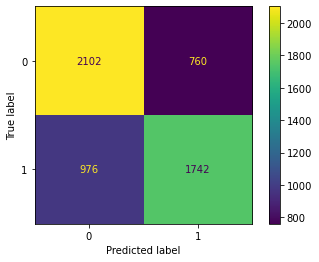

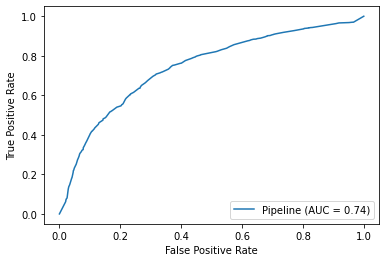

In [40]:
evaluate(clf_dt, X_train[used_cols], X_test[used_cols], y_train, y_test)

## Logistic Regression Kitchen Sink

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])

clf_lr.fit(X_train[used_cols], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cats',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['age_group', 'education',
                                                   'race', 'sex',
                                                   'income_poverty',
                                                   'marital_status',
                                                   'rent_or_own',
                                                   'employment_status']),
                                                 ('nums', StandardScaler(),
                                                  ['doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                            

Train Accuracy: 0.7088
Train F1: 0.6849
Train Precision: 0.7077
Train ROC-AUC: 0.7792
********************
Test Accuracy: 0.7081
Test F1: 0.6852
Test Precision: 0.7216
Test ROC-AUC: 0.7772


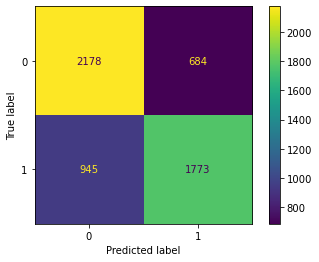

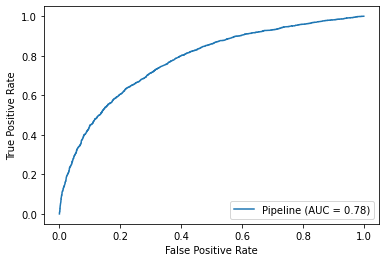

In [43]:
evaluate(clf_lr, X_train[used_cols], X_test[used_cols], y_train, y_test)

## Naive Bayes Kitchen Sink

In [44]:
from sklearn.naive_bayes import ComplementNB, GaussianNB

In [45]:
clf_nb = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('bayes', GaussianNB())
])

clf_nb.fit(X_train[used_cols], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cats',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['age_group', 'education',
                                                   'race', 'sex',
                                                   'income_poverty',
                                                   'marital_status',
                                                   'rent_or_own',
                                                   'employment_status']),
                                                 ('nums', StandardScaler(),
                                                  ['doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                            

Train Accuracy: 0.6663
Train F1: 0.6704
Train Precision: 0.6338
Train ROC-AUC: 0.7358
********************
Test Accuracy: 0.6656
Test F1: 0.6693
Test Precision: 0.6457
Test ROC-AUC: 0.7267


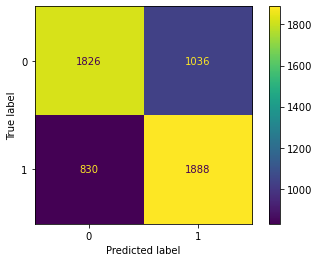

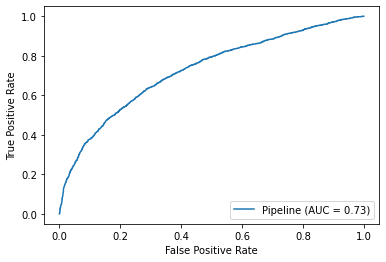

In [46]:
evaluate(clf_nb, X_train[used_cols], X_test[used_cols], y_train, y_test)

## KNN Kitchen Sink

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [48]:
X_train['education'].value_counts()

College Graduate    6735
Some College        4661
12 Years            3848
< 12 Years          1495
Name: education, dtype: int64

In [49]:
# education_key = {}
# age_key = {1: '18 - 34 Years', 2: '35 - 44 Years', 3: '45 - 54 Years', 4: '55 - 64 Years', 5: '65+ Years'}

In [50]:
KNN = KNeighborsClassifier()
scaler = StandardScaler()

In [51]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(transformers = [
    ('num_transformer', num_transformer, num_cols),
    ('cat_transformer', cat_transformer, cat_columns)
])


In [52]:
clf_kn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('KNN', KNN)
])

In [53]:
clf_kn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance',
                                                   'household_adults',
                                                   'household_children']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEn

Train Accuracy: 0.7561
Train F1: 0.7478
Train Precision: 0.7379
Train ROC-AUC: 0.8359
********************
Test Accuracy: 0.6749
Test F1: 0.6661
Test Precision: 0.6665
Test ROC-AUC: 0.7216


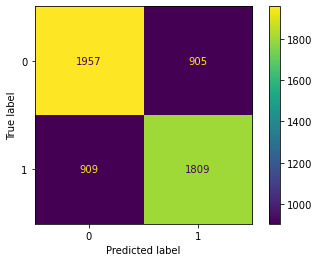

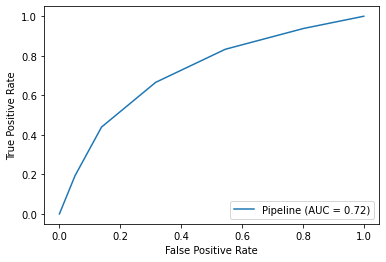

In [54]:
evaluate(clf_kn, X_train, X_test, y_train, y_test)

KNN and Decision Tree had highest accuracies.

## Exploring Hyperparamaters

Naive Bayes and KNN manipulating parameters

### NB PT. 2

No paramaters so no grid search

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

### KNN PT.2

In [56]:
ada = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ada_i', KNeighborsClassifier())
])
param_grid = {
    'ada_i__n_neighbors': [3, 5, 10],
    'ada_i__weights': ['uniform', 'distance']
}
# Create our grid search
gs = GridSearchCV(estimator=ada, param_grid=param_grid, cv = 5)
# Fit our grid search
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['doctor_recc_seasonal',
                                                                          'chronic_med_condition',
                                                                          'child_under_6_months',
                                                                          'health_worker',
                                                                          'health_insurance',
                                                                          'household_adults',
                                                

In [57]:
gs = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', verbose=3)

# Then fit it to our X_train and y_train
gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] ada_i__n_neighbors=3, ada_i__weights=uniform ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ada_i__n_neighbors=3, ada_i__weights=uniform, score=0.648, total=   0.9s
[CV] ada_i__n_neighbors=3, ada_i__weights=uniform ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  ada_i__n_neighbors=3, ada_i__weights=uniform, score=0.647, total=   0.9s
[CV] ada_i__n_neighbors=3, ada_i__weights=uniform ....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  ada_i__n_neighbors=3, ada_i__weights=uniform, score=0.654, total=   0.8s
[CV] ada_i__n_neighbors=3, ada_i__weights=uniform ....................
[CV]  ada_i__n_neighbors=3, ada_i__weights=uniform, score=0.652, total=   0.9s
[CV] ada_i__n_neighbors=3, ada_i__weights=uniform ....................
[CV]  ada_i__n_neighbors=3, ada_i__weights=uniform, score=0.664, total=   0.9s
[CV] ada_i__n_neighbors=3, ada_i__weights=distance ...................
[CV]  ada_i__n_neighbors=3, ada_i__weights=distance, score=0.639, total=   0.8s
[CV] ada_i__n_neighbors=3, ada_i__weights=distance ...................
[CV]  ada_i__n_neighbors=3, ada_i__weights=distance, score=0.633, total=   0.7s
[CV] ada_i__n_neighbors=3, ada_i__weights=distance ...................
[CV]  ada_i__n_neighbors=3, ada_i__weights=distance, score=0.642, total=   0.7s
[CV] ada_i__n_neighbors=3, ada_i__weights=distance ...................
[CV]  ada_i__n_neighbors=3, ada_i__weights=distance, score=0.652, total=   0.7s
[CV] ada_i__n_nei

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   29.5s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['doctor_recc_seasonal',
                                                                          'chronic_med_condition',
                                                                          'child_under_6_months',
                                                                          'health_worker',
                                                                          'health_insurance',
                                                                          'household_adults',
                                                

In [58]:
gs.best_params_

{'ada_i__n_neighbors': 10, 'ada_i__weights': 'uniform'}

In [59]:
gs.best_score_

0.6873178213054076

In [60]:
find scores for these optimized models
recursive feature sklearn

SyntaxError: invalid syntax (<ipython-input-60-ed63a332519c>, line 1)

Decision Tree is best model

In [ ]:
# Exploring more parameters for decision tree
